In [489]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("books_after_trim.csv")
print(df.shape)
df.head(3)

(25374, 29)


,has_litres,has_litnet,has_authoday,title,authors,rating_litres,rating_count_litres,reviews_count_litres,price_litres,release_date_litres,...,views_authoday,likes_authoday,comments_authoday,reviews_authoday,price_authoday,cycle_authoday,exclusive_authoday,genre,description,age
0,False,False,True,Абсолютное знание - развращает абсолютно,4itaka,NaN,NaN,NaN,NaN,NaN,...,36K,595,36,0.0,0.0,Скайрим,Нет,"Роман, Фанфик, Фэнтези, Попаданцы",Продолжение похождений попаданца ступившего на...,NaN
1,False,False,True,"RWBY. Во Имя Силы Юности, Я...",4k_ZEUS,NaN,NaN,NaN,NaN,NaN,...,88K,1 314,388,0.0,0.0,"Во Имя Силы Юности, Я...",Нет,"Роман, Фанфик, Фэнтези, Приключения",Попаданец в мир RWBY с внешностью Майто Гая из...,NaN
2,False,False,True,Кросс,Ach,NaN,NaN,NaN,NaN,NaN,...,410K,1 306,453,1.0,120.0,Ритм,Нет,"Роман, Космическая фантастика, Попаданцы в кос...","Присутствуют мотивы EVE. ГГ будет: пахать, пот...",NaN


In [490]:
df.dtypes.to_frame("dtype")

,dtype
has_litres,bool
has_litnet,bool
has_authoday,bool
title,object
authors,object
rating_litres,float64
rating_count_litres,float64
reviews_count_litres,float64
price_litres,float64
release_date_litres,object


In [491]:
na_share = df.isna().mean().sort_values(ascending=False).head(25)
na_share.to_frame("null_share")

,null_share
price_litnet,0.921140
year_litnet,0.921140
cycle_authoday,0.555293
reviews_authoday,0.538228
price_authoday,0.525617
views_authoday,0.525538
symbols_count_authoday,0.525538
date_authoday,0.525538
likes_authoday,0.525538
a4_sheets_authoday,0.525538


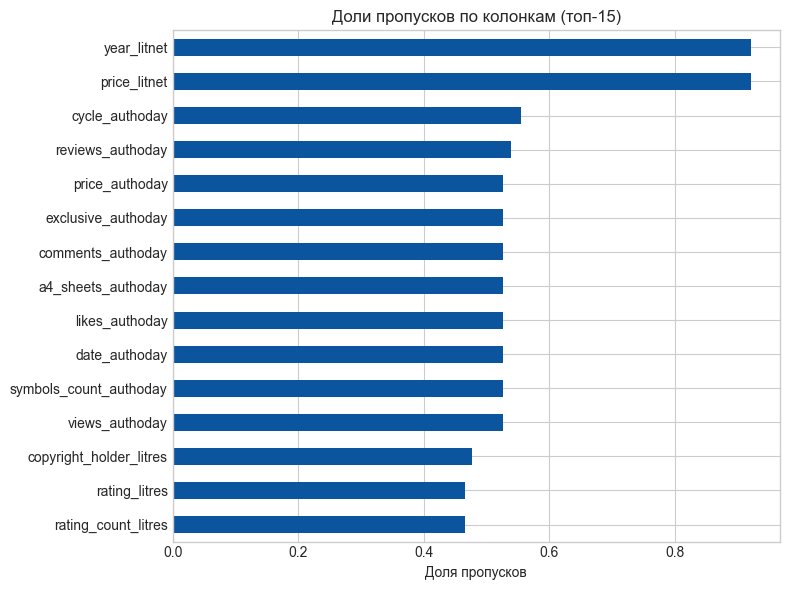

In [492]:
plt.figure(figsize=(8,6))
na_share.head(15).sort_values().plot(kind="barh")
plt.title("Доли пропусков по колонкам (топ-15)")
plt.xlabel("Доля пропусков")
plt.tight_layout()
plt.show()

In [493]:
def parse_number(x):
    if isinstance(x, str):
        x = x.replace("\u00A0", "").replace(" ", "")
        if x.endswith("K"):
            try:
                return float(x[:-1]) * 1000
            except:
                return np.nan
        try:
            return float(x)
        except:
            return np.nan
    return x

for c in ["views_authoday","likes_authoday","comments_authoday"]:
    if c in df.columns:
        df[c] = df[c].apply(parse_number)

for c in ["reviews_authoday","rating_litres","rating_count_litres",
          "reviews_count_litres","price_litres","written_date_litres",
          "price_litnet","year_litnet","price_authoday"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

df["date_authoday"] = pd.to_datetime(df.get("date_authoday"), errors="coerce")
df["release_date_litres"] = pd.to_datetime(df.get("release_date_litres"), errors="coerce")

df[["views_authoday","likes_authoday","comments_authoday","rating_litres"]].describe()

/var/folders/1_/nzn6lhf551sdbvr_7pl_5b8c0000gn/T/ipykernel_3381/1646363646.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["release_date_litres"] = pd.to_datetime(df.get("release_date_litres"), errors="coerce")


,views_authoday,likes_authoday,comments_authoday,rating_litres
count,11437.000000,12039.000000,12039.000000,13574.000000
mean,242107.616420,2397.834621,979.186893,4.750914
std,184800.942235,2067.700796,3898.498688,0.320298
min,8417.000000,550.000000,0.000000,1.000000
25%,98000.000000,904.500000,209.000000,4.700000
50%,187000.000000,1615.000000,433.000000,4.800000
75%,354000.000000,3391.000000,1020.000000,4.900000
max,996000.000000,24000.000000,197000.000000,5.000000


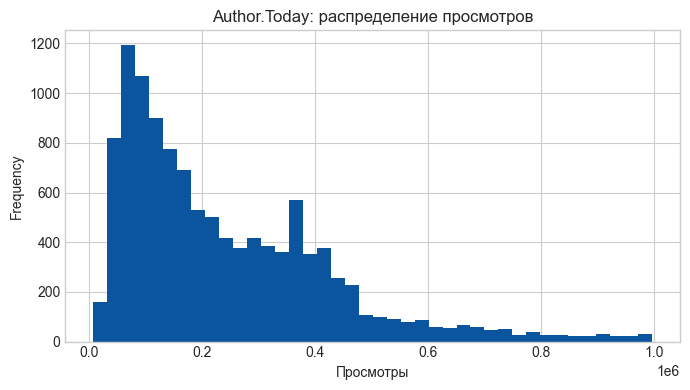

In [494]:
plt.figure(figsize=(7,4))
df["views_authoday"].dropna().plot(kind="hist", bins=40)
plt.title("Author.Today: распределение просмотров")
plt.xlabel("Просмотры")
plt.tight_layout()
plt.show()

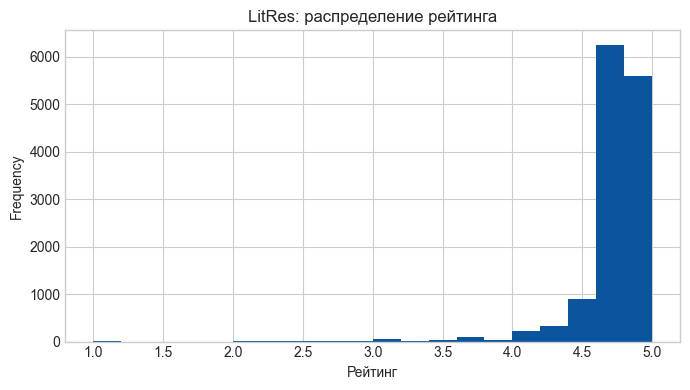

In [495]:
plt.figure(figsize=(7,4))
df["rating_litres"].dropna().plot(kind="hist", bins=20)
plt.title("LitRes: распределение рейтинга")
plt.xlabel("Рейтинг")
plt.tight_layout()
plt.show()

In [496]:
df["desc_len"] = df["description"].fillna("").map(len)
author_counts = df["authors"].fillna("unknown").value_counts()
df["author_books_count"] = df["authors"].fillna("unknown").map(author_counts)
df["is_series"] = df["cycle_authoday"].notna()

df["year_authoday"] = pd.to_datetime(df["date_authoday"], errors="coerce").dt.year
df["year_litres"] = pd.to_numeric(df["written_date_litres"], errors="coerce").round().astype("Int64")

cols_keep = [
    "title","authors","genre","description","desc_len","author_books_count","is_series",
    "views_authoday","likes_authoday","comments_authoday","reviews_authoday","price_authoday","year_authoday",
    "rating_litres","rating_count_litres","reviews_count_litres","price_litres","year_litres",
    "price_litnet","year_litnet","has_litres","has_litnet","has_authoday", "cycle_authoday"
]
dfw = df[[c for c in cols_keep if c in df.columns]].copy()
dfw.head(3)

,title,authors,genre,description,desc_len,author_books_count,is_series,views_authoday,likes_authoday,comments_authoday,...,rating_count_litres,reviews_count_litres,price_litres,year_litres,price_litnet,year_litnet,has_litres,has_litnet,has_authoday,cycle_authoday
0,Абсолютное знание - развращает абсолютно,4itaka,"Роман, Фанфик, Фэнтези, Попаданцы",Продолжение похождений попаданца ступившего на...,175,1,True,36000.0,595.0,36.0,...,NaN,NaN,NaN,<NA>,NaN,NaN,False,False,True,Скайрим
1,"RWBY. Во Имя Силы Юности, Я...",4k_ZEUS,"Роман, Фанфик, Фэнтези, Приключения",Попаданец в мир RWBY с внешностью Майто Гая из...,207,1,True,88000.0,1314.0,388.0,...,NaN,NaN,NaN,<NA>,NaN,NaN,False,False,True,"Во Имя Силы Юности, Я..."
2,Кросс,Ach,"Роман, Космическая фантастика, Попаданцы в кос...","Присутствуют мотивы EVE. ГГ будет: пахать, пот...",721,1,True,410000.0,1306.0,453.0,...,NaN,NaN,NaN,<NA>,NaN,NaN,False,False,True,Ритм


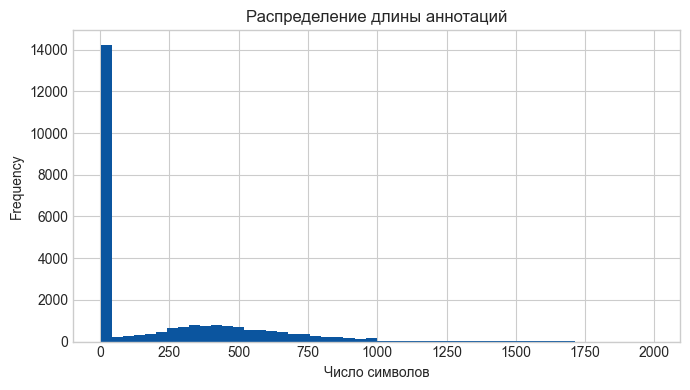

In [497]:
plt.figure(figsize=(7,4))
dfw["desc_len"].plot(kind="hist", bins=50)
plt.title("Распределение длины аннотаций")
plt.xlabel("Число символов")
plt.tight_layout()
plt.show()

In [498]:
d_at = dfw[dfw["has_authoday"]].copy()
d_lr = dfw[dfw["has_litres"]].copy()
d_ln = dfw[dfw["has_litnet"]].copy()

{ "Author.Today": d_at.shape, "LitRes": d_lr.shape, "LitNet": d_ln.shape }

{'Author.Today': (12039, 24), 'LitRes': (14063, 24), 'LitNet': (2001, 24)}

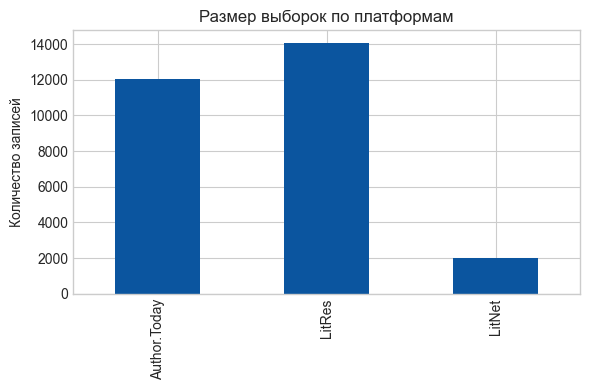

In [499]:
plt.figure(figsize=(6,4))
pd.Series({
    "Author.Today": len(d_at),
    "LitRes": len(d_lr),
    "LitNet": len(d_ln)
}).plot(kind="bar")
plt.title("Размер выборок по платформам")
plt.ylabel("Количество записей")
plt.tight_layout()
plt.show()

In [500]:
at_genre_pop = (
    d_at.groupby("genre")[["views_authoday","likes_authoday","comments_authoday"]]
      .mean().sort_values("views_authoday", ascending=False)
)
at_genre_pop.head(10)

,views_authoday,likes_authoday,comments_authoday
genre,,,
"Роман, Космическая фантастика, Попаданцы в космос, Боевое фэнтези",992000.0,1536.0,766.0
"Роман, Фантастика, Попаданцы в магические миры, Технофэнтези",988000.0,8636.0,26000.0
"Роман, Космическая фантастика, Попаданцы в магические миры, Фэнтези",985000.0,3598.0,428.0
"Роман, Попаданцы во времени, Боевое фэнтези, Альтернативная история",985000.0,7627.0,2230.0
"Роман, Альтернативная история, Приключения, Боевая фантастика",977000.0,2823.0,7044.0
"Роман, ЛитРПГ, Юмор, Юмористическая фантастика",960000.0,1735.0,681.0
"Роман, РеалРПГ, Городское фэнтези, Постапокалипсис",952000.0,6994.0,1867.0
"Роман, Магическая академия, Романтическое фэнтези, Приключения",946000.0,1259.0,51.0
"Роман, ЛитРПГ, Попаданцы в магические миры, Юмористическое фэнтези",940000.0,3728.0,896.0


<Figure size 900x600 with 0 Axes>

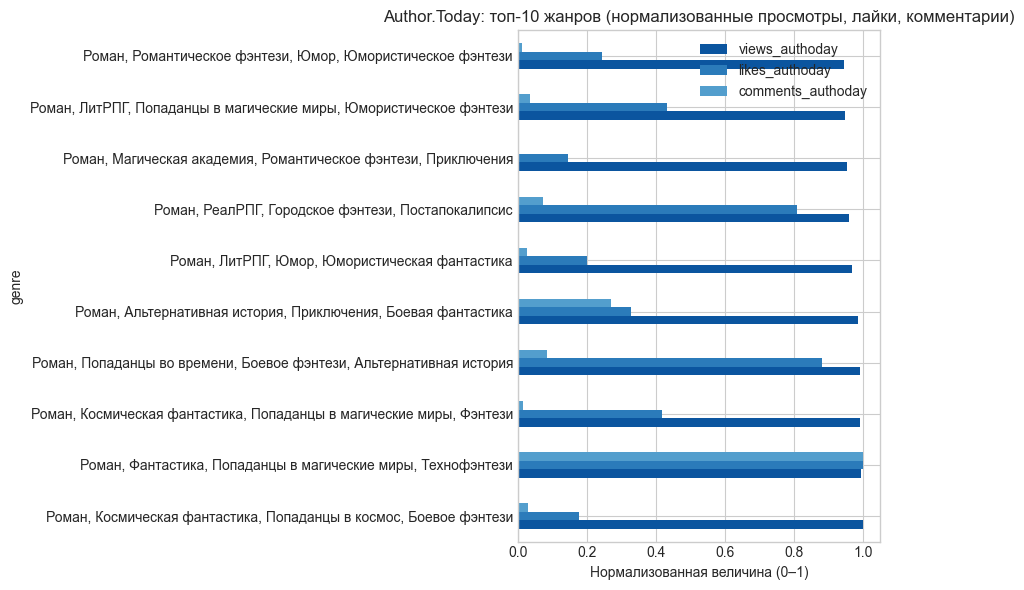

In [501]:
top_genres = at_genre_pop.sort_values("views_authoday", ascending=False).head(10)

norm = top_genres / top_genres.max()

plt.figure(figsize=(9,6))
norm.plot(kind="barh", stacked=False, figsize=(9,6))
plt.title("Author.Today: топ-10 жанров (нормализованные просмотры, лайки, комментарии)")
plt.xlabel("Нормализованная величина (0–1)")
plt.tight_layout()
plt.show()

In [502]:
corr_desc_views_at = d_at[["desc_len","views_authoday"]].corr().iloc[0,1]
corr_desc_likes_at = d_at[["desc_len","likes_authoday"]].corr().iloc[0,1]
print("AT corr(desc_len, views) =", round(corr_desc_views_at,3))
print("AT corr(desc_len, likes) =", round(corr_desc_likes_at,3))

AT corr(desc_len, views) = -0.085
AT corr(desc_len, likes) = -0.18


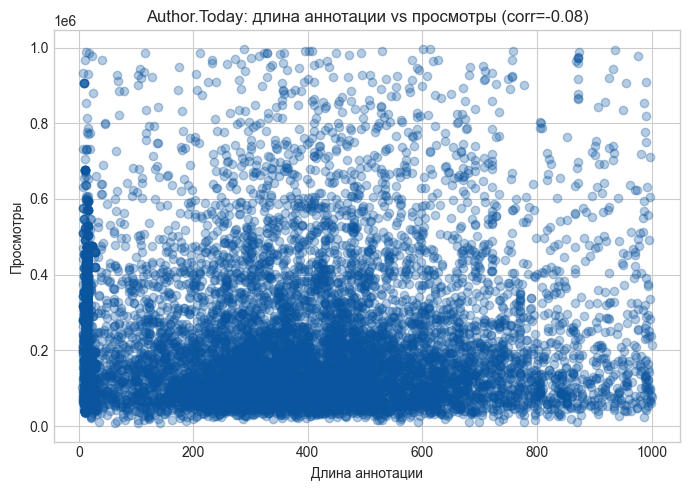

In [503]:
plt.figure(figsize=(7,5))
plt.scatter(d_at["desc_len"], d_at["views_authoday"], alpha=0.3)
plt.title(f"Author.Today: длина аннотации vs просмотры (corr={corr_desc_views_at:.2f})")
plt.xlabel("Длина аннотации")
plt.ylabel("Просмотры")
plt.tight_layout()
plt.show()

In [504]:
corr_auth_views_at = d_at[["author_books_count","views_authoday"]].corr().iloc[0,1]
corr_auth_likes_at = d_at[["author_books_count","likes_authoday"]].corr().iloc[0,1]
print("AT corr(author_books_count, views) =", round(corr_auth_views_at,3))
print("AT corr(author_books_count, likes) =", round(corr_auth_likes_at,3))

AT corr(author_books_count, views) = 0.249
AT corr(author_books_count, likes) = 0.452


In [505]:
year_stats_at = (
    d_at.groupby("year_authoday")[["views_authoday","likes_authoday"]]
        .mean().dropna().sort_index()
)
year_stats_at.head(), year_stats_at.tail()

(               views_authoday  likes_authoday
 year_authoday                                
 2016.0          375500.000000     1190.500000
 2017.0          230000.000000     1991.948276
 2018.0          244411.267606     2126.311558
 2019.0          291558.758315     2183.420233
 2020.0          261922.974768     2148.174757,
                views_authoday  likes_authoday
 year_authoday                                
 2021.0          274414.610069     2162.559783
 2022.0          260600.424708     2159.879158
 2023.0          252093.182163     2667.701919
 2024.0          241269.693842     2604.843802
 2025.0          194890.399670     2333.067048)

In [506]:
d_at["author_group"] = pd.cut(
    d_at["author_books_count"],
    bins=[0,1,3,10,30,100,1000],
    labels=["1","2–3","4–10","11–30","31–100",">100"]
)


/var/folders/1_/nzn6lhf551sdbvr_7pl_5b8c0000gn/T/ipykernel_3381/1143358362.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d_at.groupby("author_group")["likes_authoday"]


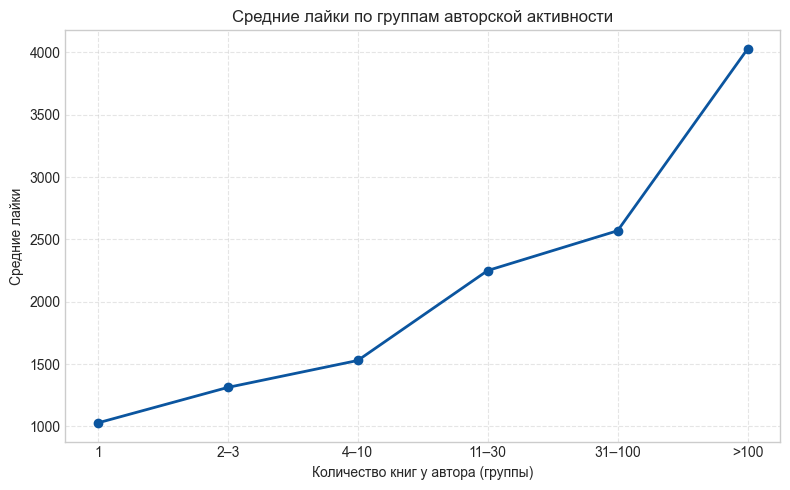

In [507]:
mean_likes = (
    d_at.groupby("author_group")["likes_authoday"]
    .mean().dropna()
)

plt.figure(figsize=(8,5))
plt.plot(mean_likes.index.astype(str), mean_likes.values, marker="o", linewidth=2)
plt.title("Средние лайки по группам авторской активности")
plt.xlabel("Количество книг у автора (группы)")
plt.ylabel("Средние лайки")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

/var/folders/1_/nzn6lhf551sdbvr_7pl_5b8c0000gn/T/ipykernel_3381/2513650384.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d_at.groupby("author_group")["likes_authoday"]


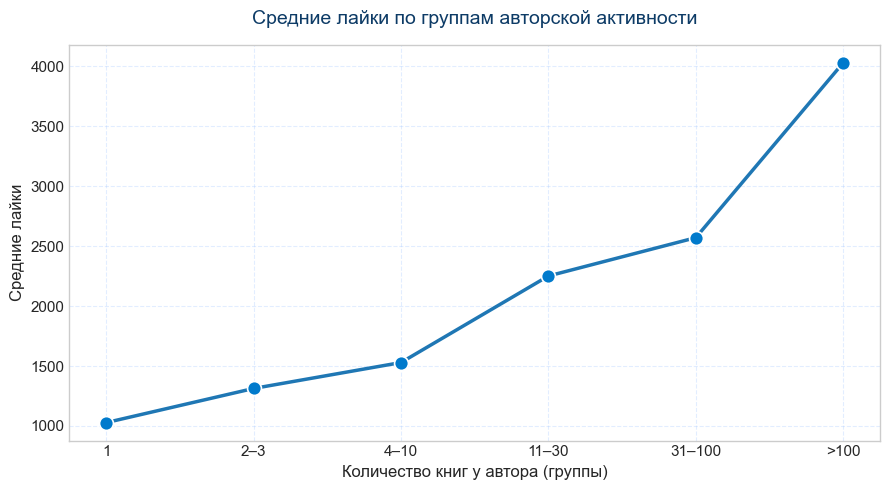

In [508]:

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Blues_r")

mean_likes = (
    d_at.groupby("author_group")["likes_authoday"]
    .mean()
    .dropna()
)

plt.figure(figsize=(9,5))
sns.lineplot(
    x=mean_likes.index.astype(str),
    y=mean_likes.values,
    marker="o",
    linewidth=2.5,
    color="#1f77b4",
)

plt.title("Средние лайки по группам авторской активности", fontsize=14, pad=15, color="#0d3b66")
plt.xlabel("Количество книг у автора (группы)", fontsize=12)
plt.ylabel("Средние лайки", fontsize=12)
plt.grid(alpha=0.3, linestyle="--", color="#a0c4ff")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

for x, y in zip(mean_likes.index.astype(str), mean_likes.values):
    plt.scatter(x, y, s=100, color="#007acc", edgecolor="white", linewidth=1.2, zorder=3)

plt.show()

In [509]:
year_stats_lr = (
    d_lr.groupby("year_litres")[["rating_litres","reviews_count_litres"]]
        .mean().dropna().sort_index()
)
year_stats_lr.head(), year_stats_lr.tail()

(             rating_litres  reviews_count_litres
 year_litres                                     
 1898                   4.5                  20.0
 1920                   4.9                   3.0
 1962                   4.8                 120.0
 1971                   4.7                 144.0
 1975                   3.8                   0.0,
              rating_litres  reviews_count_litres
 year_litres                                     
 2021              4.717902             35.475588
 2022              4.742614             31.896045
 2023              4.740827             25.062606
 2024              4.769453             19.629287
 2025              4.762269              9.764819)

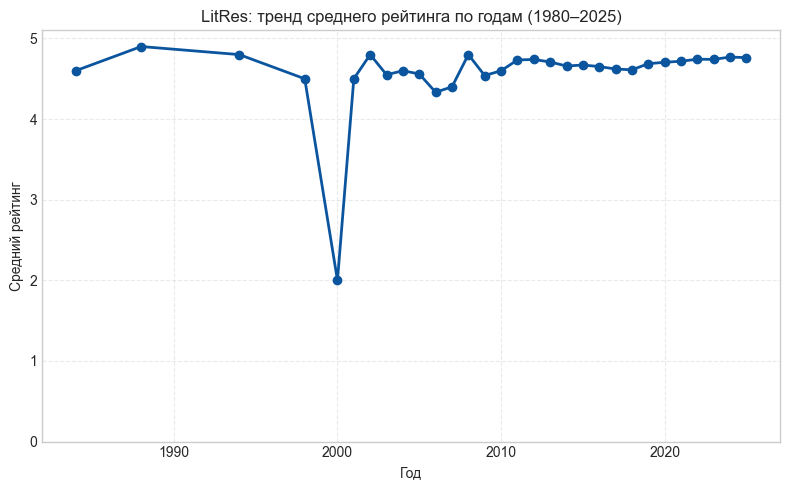

In [510]:

filtered = year_stats_lr.loc[year_stats_lr.index >= 1980].copy()

plt.figure(figsize=(8,5))
plt.plot(filtered.index, filtered["rating_litres"], marker="o", linewidth=2)
plt.title("LitRes: тренд среднего рейтинга по годам (1980–2025)")
plt.xlabel("Год")
plt.ylabel("Средний рейтинг")
plt.ylim(0, 5.1)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

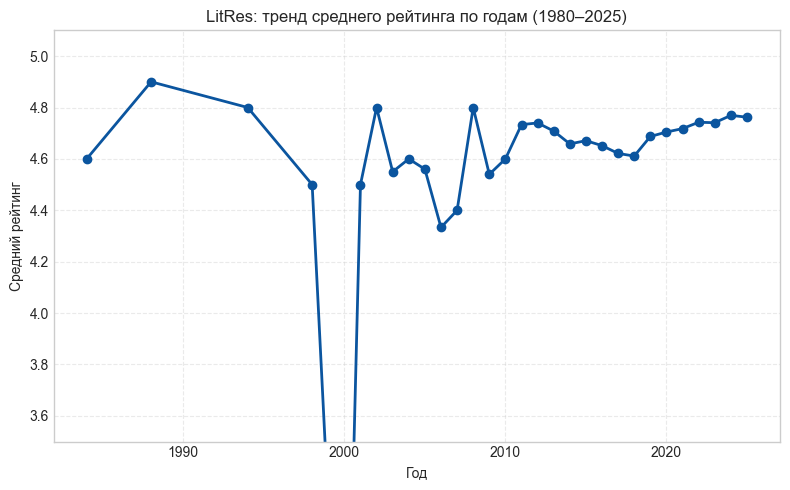

In [511]:

filtered = year_stats_lr.loc[year_stats_lr.index >= 1980].copy()

plt.figure(figsize=(8,5))
plt.plot(filtered.index, filtered["rating_litres"], marker="o", linewidth=2)
plt.title("LitRes: тренд среднего рейтинга по годам (1980–2025)")
plt.xlabel("Год")
plt.ylabel("Средний рейтинг")
plt.ylim(3.5, 5.1)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

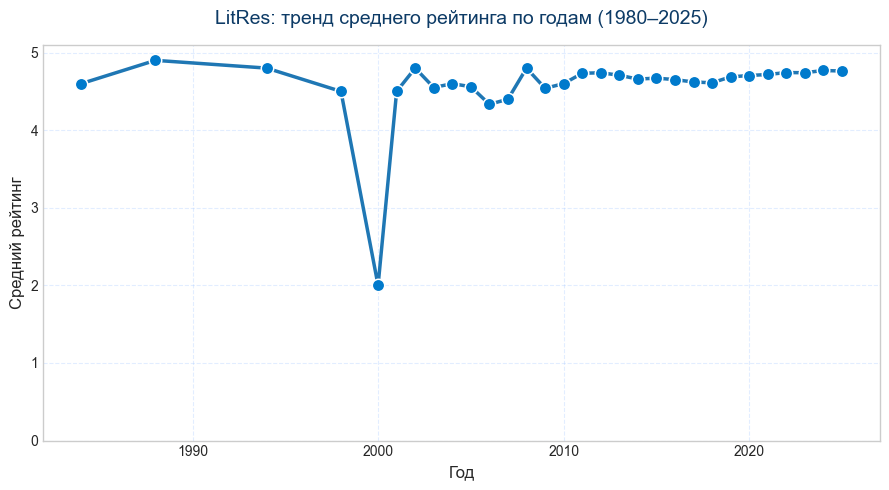

In [512]:
filtered = year_stats_lr.loc[year_stats_lr.index >= 1980].copy()

plt.figure(figsize=(9,5))
sns.lineplot(
    x=filtered.index,
    y=filtered["rating_litres"],
    marker="o",
    linewidth=2.5,
    color="#1f77b4"
)

plt.title("LitRes: тренд среднего рейтинга по годам (1980–2025)", fontsize=14, pad=15, color="#0d3b66")
plt.xlabel("Год", fontsize=12)
plt.ylabel("Средний рейтинг", fontsize=12)
plt.ylim(0, 5.1)
plt.grid(alpha=0.3, linestyle="--", color="#a0c4ff")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

for x, y in zip(filtered.index, filtered["rating_litres"]):
    plt.scatter(x, y, s=80, color="#007acc", edgecolor="white", linewidth=1.1, zorder=3)

plt.show()

In [513]:
def slope_year_trend(s: pd.Series):
    s = s.dropna()
    if s.index.dtype.kind in "iuf" and len(s) >= 2:
        x = s.index.values.astype(float)
        y = s.values.astype(float)
        return np.polyfit(x, y, 1)[0]
    return np.nan

comp = pd.DataFrame({
    "metric": [
        "corr(desc_len, popularity)",
        "corr(author_books_count, popularity)",
        "year trend (slope) of popularity"
    ]
})

at_desc_corr  = d_at[["desc_len","views_authoday"]].corr().iloc[0,1]
lr_desc_corr  = d_lr[["desc_len","rating_litres"]].corr().iloc[0,1]
at_auth_corr  = d_at[["author_books_count","views_authoday"]].corr().iloc[0,1]
lr_auth_corr  = d_lr[["author_books_count","rating_litres"]].corr().iloc[0,1]
at_year_slope = slope_year_trend(year_stats_at["views_authoday"])
lr_year_slope = slope_year_trend(year_stats_lr["rating_litres"])

comp["Author.Today"] = [round(at_desc_corr,3), round(at_auth_corr,3),
                        round(at_year_slope,3) if pd.notna(at_year_slope) else np.nan]
comp["LitRes"]       = [round(lr_desc_corr,3), round(lr_auth_corr,3),
                        round(lr_year_slope,3) if pd.notna(lr_year_slope) else np.nan]

comp

,metric,Author.Today,LitRes
0,"corr(desc_len, popularity)",-0.085,-0.022
1,"corr(author_books_count, popularity)",0.249,0.040
2,year trend (slope) of popularity,-9627.711,0.000


In [514]:

both = dfw[
    dfw["has_authoday"] & dfw["has_litres"] &
    dfw["price_authoday"].notna() & dfw["price_litres"].notna()
].copy()

both = both[(both["price_authoday"] > 0) & (both["price_litres"] > 0)]

both["title_norm"]  = both["title"].str.strip().str.lower()
both["authors_norm"] = both["authors"].fillna("unknown").str.strip().str.lower()

both.shape

(2573, 26)

In [515]:
key = ["title_norm","authors_norm"]
both_agg = (both
            .groupby(key, as_index=False)
            .agg({
                "title": "first",
                "authors": "first",
                "genre": "first",
                "price_authoday": "median",
                "price_litres": "median",
            }))

both_agg.shape

(488, 7)

In [516]:
both_agg["price_ratio_AT_to_LR"] = both_agg["price_authoday"] / both_agg["price_litres"]
both_agg["price_diff_AT_minus_LR"] = both_agg["price_authoday"] - both_agg["price_litres"]

summary = {
    "n_matched": len(both_agg),
    "median_AT": both_agg["price_authoday"].median(),
    "median_LR": both_agg["price_litres"].median(),
    "median_ratio_AT/LR": both_agg["price_ratio_AT_to_LR"].median(),
    "share_AT_cheaper": float((both_agg["price_authoday"] < both_agg["price_litres"]).mean()),
    "pearson_corr": both_agg[["price_authoday","price_litres"]].corr().iloc[0,1]
}
summary

{'n_matched': 488,
 'median_AT': np.float64(159.0),
 'median_LR': np.float64(164.0),
 'median_ratio_AT/LR': np.float64(1.0),
 'share_AT_cheaper': 0.49385245901639346,
 'pearson_corr': np.float64(0.27181540318521297)}

In [517]:
outliers = (
    both_agg
    .assign(abs_diff = (both_agg["price_diff_AT_minus_LR"]).abs())
    .sort_values("abs_diff", ascending=False)
    .loc[:, ["title","authors","genre","price_authoday","price_litres","price_diff_AT_minus_LR","price_ratio_AT_to_LR"]]
    .head(20)
)
outliers

,title,authors,genre,price_authoday,price_litres,price_diff_AT_minus_LR,price_ratio_AT_to_LR
413,Старатели. Специалист,Влад Лей,"Вебтуны, боевая фантастика, Боевая фантастика,...",92.95,249.0,-156.05,0.373293
414,Старатель,Влад Лей,"Вебтуны, боевая фантастика, Боевая фантастика,...",96.85,249.0,-152.15,0.388956
445,Титан: Возрождение,Ивар Рави,"Вебтуны, героическая фантастика, Героическая ф...",159.00,299.0,-140.00,0.531773
400,Слесарь. Книга 1,Иннокентий Белов,"Вебтуны, попаданцы, Боевое фэнтези, Книги про ...",19.80,159.0,-139.20,0.124528
349,Разыскиваем маму. Срочно. Том 3,Лира Алая,"Вебтуны, юмористическое фэнтези, Любовное фэнт...",79.50,199.0,-119.50,0.399497
348,Разыскиваем маму. Срочно! Том 1–2,Лира Алая,"Вебтуны, юмористическое фэнтези, Любовное фэнт...",79.50,199.0,-119.50,0.399497
237,Маны – полные карманы!,Константин Денисов,"Вебтуны, книги про волшебников, Боевое фэнтези...",89.40,199.0,-109.60,0.449246
415,Старатель 2,Влад Лей,"Вебтуны, боевая фантастика, Боевая фантастика,...",143.65,249.0,-105.35,0.576908
217,Крылья Мальгуса. Ступень первая,Инди Видум,"Вебтуны, попаданцы, Городское фэнтези, Попаданцы",96.75,199.0,-102.25,0.486181
347,"Пушкин, кружка, два ствола",Юлия Стешенко,"Вебтуны, городское фэнтези, Городское фэнтези,...",149.00,249.0,-100.00,0.598394


/var/folders/1_/nzn6lhf551sdbvr_7pl_5b8c0000gn/T/ipykernel_3381/2136091757.py:22: UserWarning: Glyph 8381 (\N{RUBLE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/maksimbazanov/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8381 (\N{RUBLE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


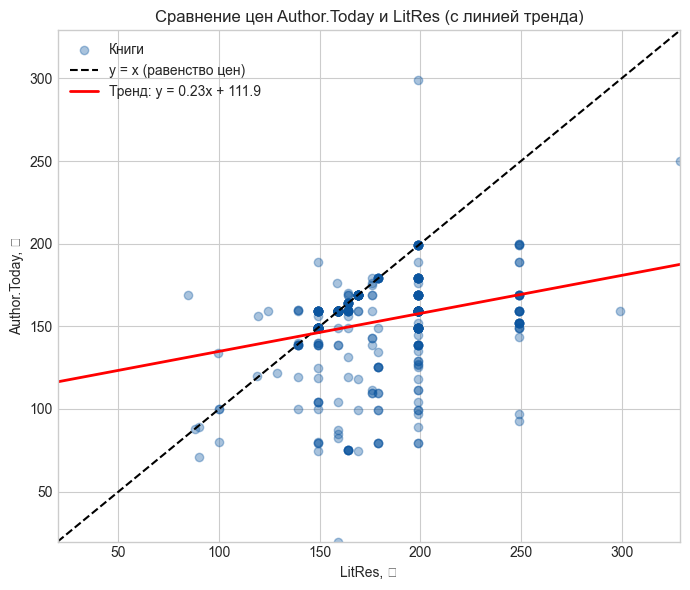

In [518]:
import numpy as np
import matplotlib.pyplot as plt

x = both_agg["price_litres"]
y = both_agg["price_authoday"]

plt.figure(figsize=(7,6))
plt.scatter(x, y, alpha=0.35, label="Книги")

lims = [min(x.min(), y.min()), max(x.max(), y.max())]
plt.plot(lims, lims, "k--", label="y = x (равенство цен)")

coef = np.polyfit(x, y, 1)
trend_fn = np.poly1d(coef)
plt.plot(lims, trend_fn(lims), color="red", linewidth=2, label=f"Тренд: y = {coef[0]:.2f}x + {coef[1]:.1f}")

plt.xlim(lims); plt.ylim(lims)
plt.xlabel("LitRes, ₽")
plt.ylabel("Author.Today, ₽")
plt.title("Сравнение цен Author.Today и LitRes (с линией тренда)")
plt.legend()
plt.tight_layout()
plt.show()

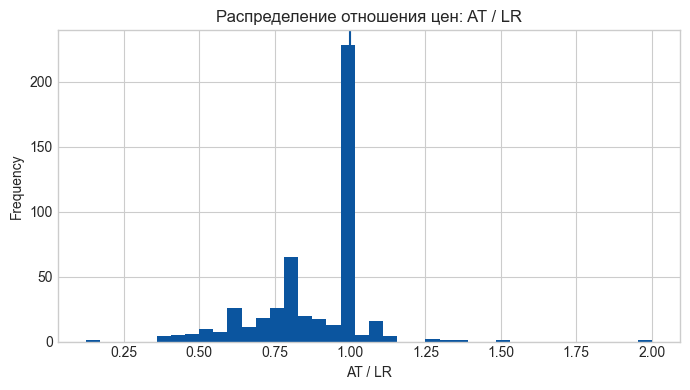

In [519]:
plt.figure(figsize=(7,4))
both_agg["price_ratio_AT_to_LR"].plot(kind="hist", bins=40)
plt.axvline(1.0)  
plt.title("Распределение отношения цен: AT / LR")
plt.xlabel("AT / LR")
plt.tight_layout()
plt.show()

/var/folders/1_/nzn6lhf551sdbvr_7pl_5b8c0000gn/T/ipykernel_3381/404190384.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_likes = d_at.groupby("price_bin")["likes_authoday"].mean()
/var/folders/1_/nzn6lhf551sdbvr_7pl_5b8c0000gn/T/ipykernel_3381/404190384.py:12: UserWarning: Glyph 8381 (\N{RUBLE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/maksimbazanov/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8381 (\N{RUBLE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


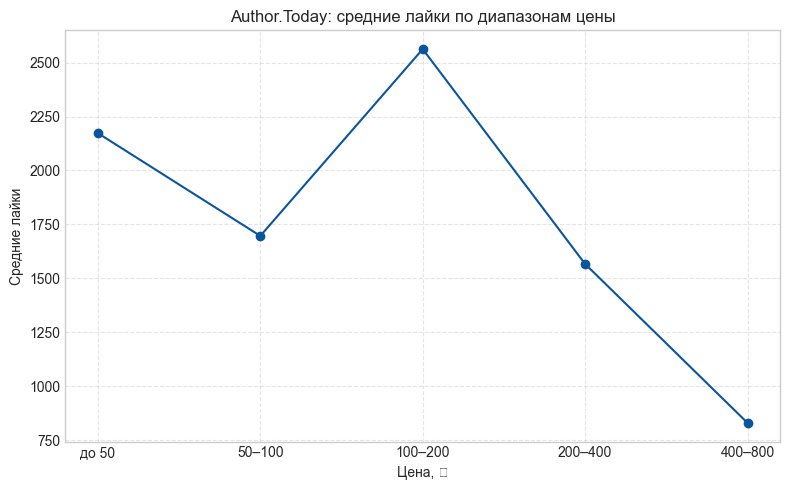

In [520]:
bins = [0, 50, 100, 200, 400, 800, 1600]
labels = ["до 50","50–100","100–200","200–400","400–800","800+"]
d_at["price_bin"] = pd.cut(d_at["price_authoday"], bins=bins, labels=labels)
mean_likes = d_at.groupby("price_bin")["likes_authoday"].mean()

plt.figure(figsize=(8,5))
plt.plot(mean_likes.index.astype(str), mean_likes.values, marker="o")
plt.title("Author.Today: средние лайки по диапазонам цены")
plt.xlabel("Цена, ₽")
plt.ylabel("Средние лайки")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

/var/folders/1_/nzn6lhf551sdbvr_7pl_5b8c0000gn/T/ipykernel_3381/1674854111.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rating = d_lr.groupby("price_bin")["rating_litres"].mean()
/var/folders/1_/nzn6lhf551sdbvr_7pl_5b8c0000gn/T/ipykernel_3381/1674854111.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_reviews = d_lr.groupby("price_bin")["reviews_count_litres"].mean()
/var/folders/1_/nzn6lhf551sdbvr_7pl_5b8c0000gn/T/ipykernel_3381/1674854111.py:23: UserWarning: Glyph 8381 (\N{RUBLE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/maksimbazanov/Library/Python/3.13/lib/python/si

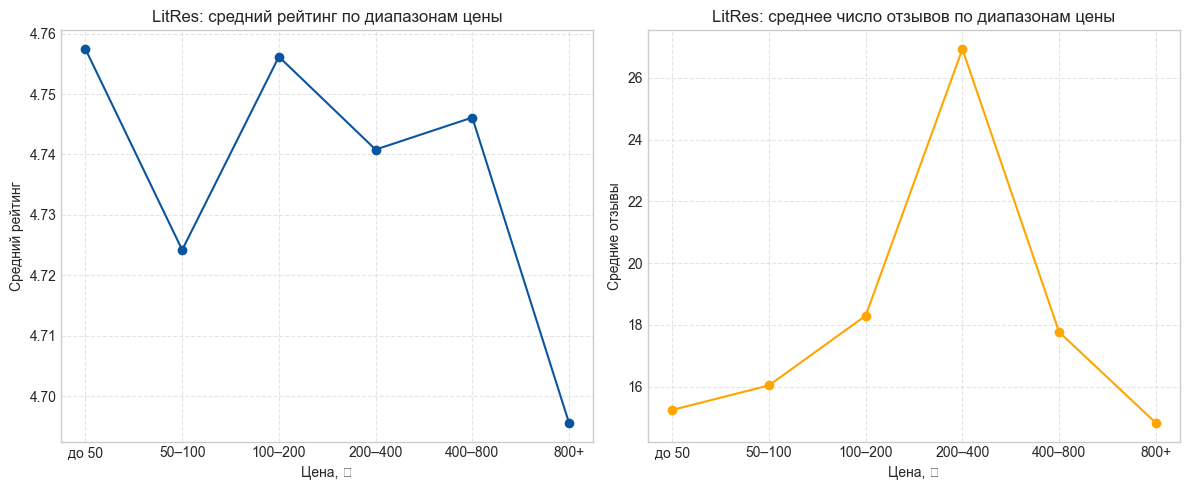

In [521]:
bins = [0, 50, 100, 200, 400, 800, 1600]
labels = ["до 50","50–100","100–200","200–400","400–800","800+"]

d_lr["price_bin"] = pd.cut(d_lr["price_litres"], bins=bins, labels=labels)

mean_rating = d_lr.groupby("price_bin")["rating_litres"].mean()
mean_reviews = d_lr.groupby("price_bin")["reviews_count_litres"].mean()

fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(mean_rating.index.astype(str), mean_rating.values, marker="o")
ax[0].set_title("LitRes: средний рейтинг по диапазонам цены")
ax[0].set_xlabel("Цена, ₽")
ax[0].set_ylabel("Средний рейтинг")
ax[0].grid(True, linestyle="--", alpha=0.5)

ax[1].plot(mean_reviews.index.astype(str), mean_reviews.values, marker="o", color="orange")
ax[1].set_title("LitRes: среднее число отзывов по диапазонам цены")
ax[1].set_xlabel("Цена, ₽")
ax[1].set_ylabel("Средние отзывы")
ax[1].grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

/var/folders/1_/nzn6lhf551sdbvr_7pl_5b8c0000gn/T/ipykernel_3381/3303761234.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = d_at.pivot_table(


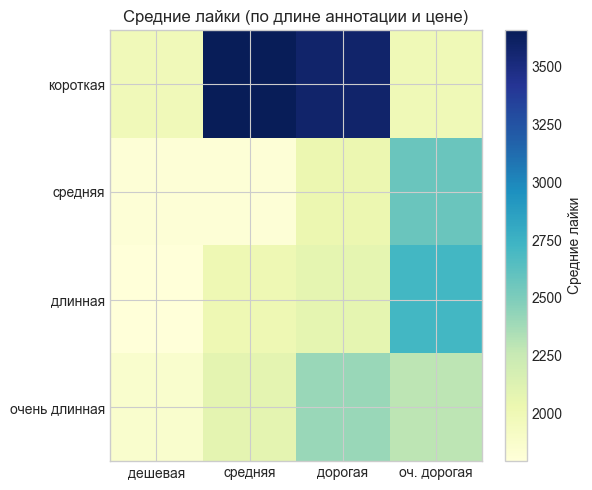

In [522]:
d_at["desc_group"] = pd.qcut(d_at["desc_len"], q=4, labels=["короткая","средняя","длинная","очень длинная"])
d_at["price_group"] = pd.qcut(d_at["price_authoday"], q=4, labels=["дешевая","средняя","дорогая","оч. дорогая"])

pivot = d_at.pivot_table(
    index="desc_group", columns="price_group",
    values="likes_authoday", aggfunc="mean"
)

plt.figure(figsize=(6,5))
plt.imshow(pivot, cmap="YlGnBu", aspect="auto")
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.title("Средние лайки (по длине аннотации и цене)")
plt.colorbar(label="Средние лайки")
plt.tight_layout()
plt.show()

/var/folders/1_/nzn6lhf551sdbvr_7pl_5b8c0000gn/T/ipykernel_3381/225145864.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = d_at.pivot_table(


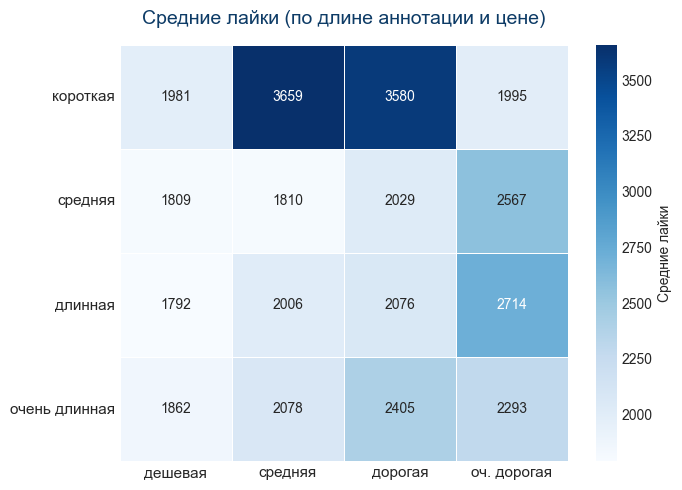

In [523]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

d_at["desc_group"] = pd.qcut(d_at["desc_len"], q=4, labels=["короткая","средняя","длинная","очень длинная"])
d_at["price_group"] = pd.qcut(d_at["price_authoday"], q=4, labels=["дешевая","средняя","дорогая","оч. дорогая"])

pivot = d_at.pivot_table(
    index="desc_group",
    columns="price_group",
    values="likes_authoday",
    aggfunc="mean"
)

plt.figure(figsize=(7,5))
sns.heatmap(
    pivot,
    cmap="Blues",
    annot=True,
    fmt=".0f",
    linewidths=0.6,
    cbar_kws={"label": "Средние лайки"}
)

plt.title("Средние лайки (по длине аннотации и цене)", fontsize=14, pad=15, color="#0d3b66")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

/var/folders/1_/nzn6lhf551sdbvr_7pl_5b8c0000gn/T/ipykernel_3381/2620949972.py:8: UserWarning: Glyph 8381 (\N{RUBLE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/maksimbazanov/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8381 (\N{RUBLE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


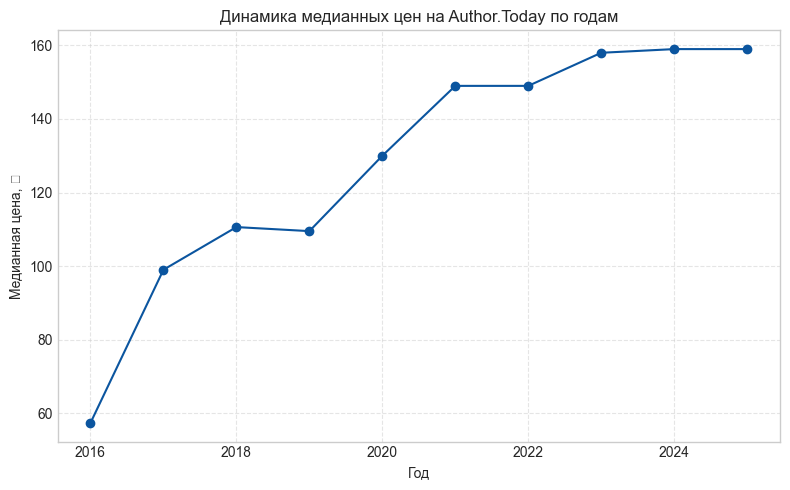

In [524]:
year_price = d_at.groupby("year_authoday")["price_authoday"].median().dropna()
plt.figure(figsize=(8,5))
plt.plot(year_price.index, year_price.values, marker="o")
plt.title("Динамика медианных цен на Author.Today по годам")
plt.xlabel("Год")
plt.ylabel("Медианная цена, ₽")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

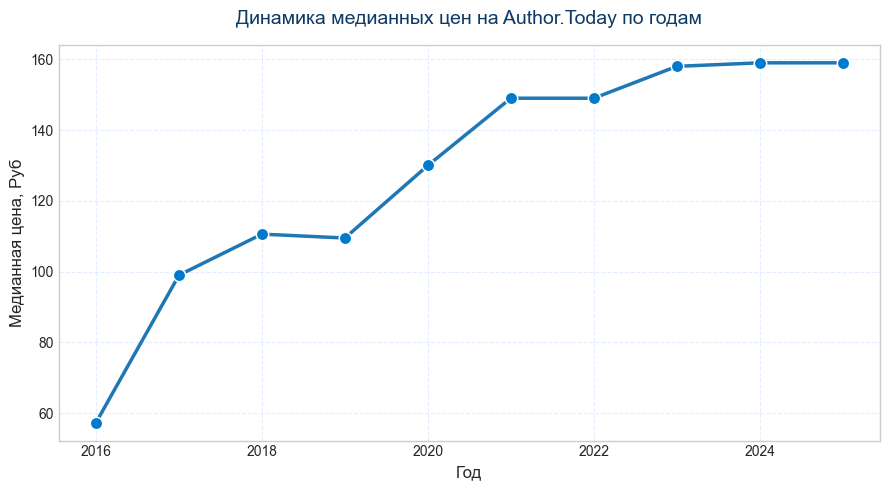

In [525]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Blues_r")

year_price = d_at.groupby("year_authoday")["price_authoday"].median().dropna()

plt.figure(figsize=(9,5))
sns.lineplot(
    x=year_price.index,
    y=year_price.values,
    marker="o",
    linewidth=2.5,
    color="#1f77b4"
)

plt.title("Динамика медианных цен на Author.Today по годам", fontsize=14, pad=15, color="#0d3b66")
plt.xlabel("Год", fontsize=12)
plt.ylabel("Медианная цена, Руб", fontsize=12)
plt.grid(alpha=0.3, linestyle="--", color="#a0c4ff")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

for x, y in zip(year_price.index, year_price.values):
    plt.scatter(x, y, s=80, color="#007acc", edgecolor="white", linewidth=1.1, zorder=3)

plt.show()

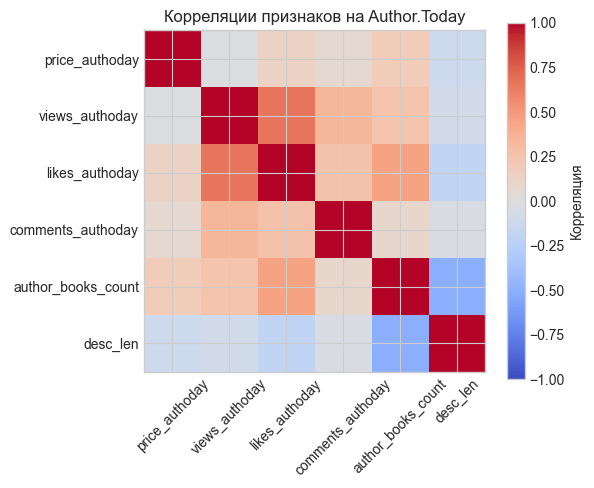

In [526]:
cols = ["price_authoday","views_authoday","likes_authoday","comments_authoday","author_books_count","desc_len"]
corr = d_at[cols].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(range(len(cols)), cols, rotation=45)
plt.yticks(range(len(cols)), cols)
plt.colorbar(label="Корреляция")
plt.title("Корреляции признаков на Author.Today")
plt.tight_layout()
plt.show()

/var/folders/1_/nzn6lhf551sdbvr_7pl_5b8c0000gn/T/ipykernel_3381/837311863.py:15: UserWarning: Glyph 8381 (\N{RUBLE SIGN}) missing from font(s) Arial.
  fig.tight_layout(); plt.show()
/Users/maksimbazanov/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8381 (\N{RUBLE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


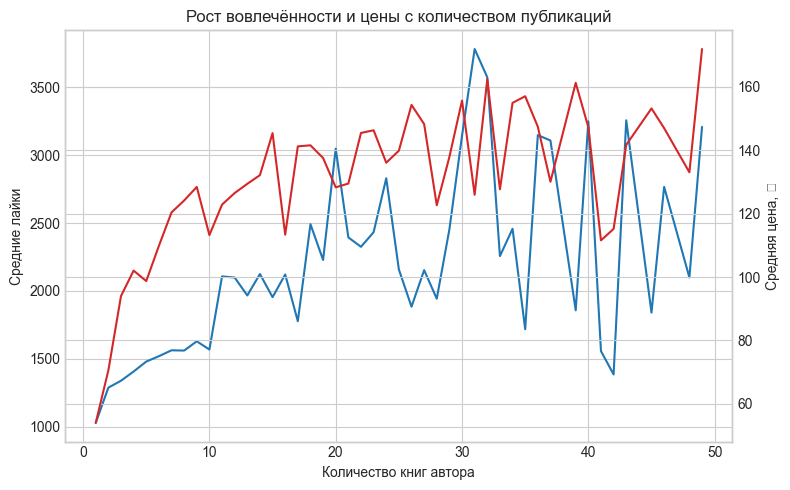

In [527]:
author_dyn = (
    d_at.groupby("author_books_count")[["likes_authoday","price_authoday"]]
    .mean().query("author_books_count < 50")
)

fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(author_dyn.index, author_dyn["likes_authoday"], color="tab:blue", label="Лайки")
ax2 = ax1.twinx()
ax2.plot(author_dyn.index, author_dyn["price_authoday"], color="tab:red", label="Цена")

ax1.set_xlabel("Количество книг автора")
ax1.set_ylabel("Средние лайки")
ax2.set_ylabel("Средняя цена, ₽")
plt.title("Рост вовлечённости и цены с количеством публикаций")
fig.tight_layout(); plt.show()

/var/folders/1_/nzn6lhf551sdbvr_7pl_5b8c0000gn/T/ipykernel_3381/1668251979.py:35: UserWarning: Glyph 8381 (\N{RUBLE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/maksimbazanov/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8381 (\N{RUBLE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


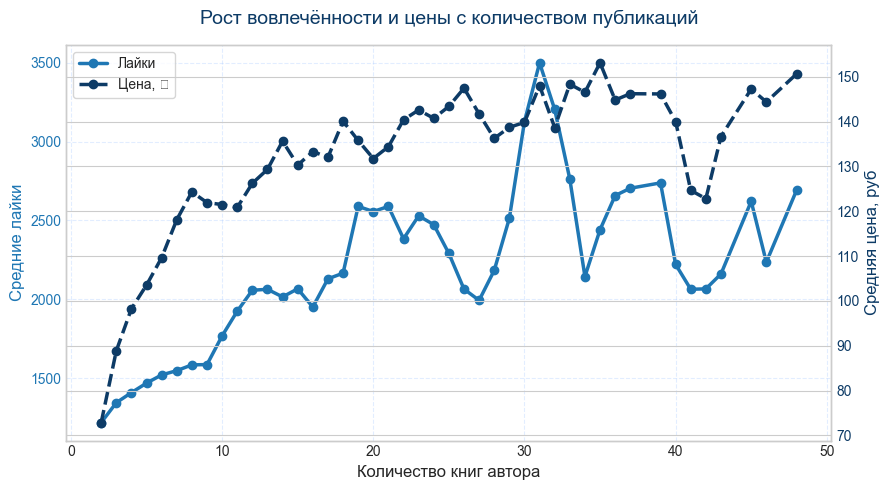

In [528]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Blues_r")

author_dyn = (
    d_at.groupby("author_books_count")[["likes_authoday","price_authoday"]]
      .mean().query("author_books_count < 50")
      .sort_index()
)

likes = author_dyn["likes_authoday"].rolling(3, center=True).mean()
price = author_dyn["price_authoday"].rolling(3, center=True).mean()

fig, ax1 = plt.subplots(figsize=(9,5))
ax2 = ax1.twinx()

ax1.plot(author_dyn.index, likes, color="#1f77b4", linewidth=2.5, marker="o", label="Лайки")
ax2.plot(author_dyn.index, price, color="#0d3b66", linewidth=2.5, linestyle="--", marker="o", label="Цена, ₽")

ax1.set_xlabel("Количество книг автора", fontsize=12)
ax1.set_ylabel("Средние лайки", fontsize=12, color="#1f77b4")
ax2.set_ylabel("Средняя цена, руб", fontsize=12, color="#0d3b66")
ax1.tick_params(axis="y", colors="#1f77b4")
ax2.tick_params(axis="y", colors="#0d3b66")

ax1.grid(alpha=0.3, linestyle="--", color="#a0c4ff")
plt.title("Рост вовлечённости и цены с количеством публикаций", fontsize=14, pad=15, color="#0d3b66")

lines = ax1.get_lines() + ax2.get_lines()
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="upper left", frameon=True)

plt.tight_layout()
plt.show()

In [529]:


d_at["is_free"] = (d_at["price_authoday"].fillna(0) == 0).astype(float)

/var/folders/1_/nzn6lhf551sdbvr_7pl_5b8c0000gn/T/ipykernel_3381/3832286566.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = d_at.groupby("books_group")["is_free"].mean().dropna()


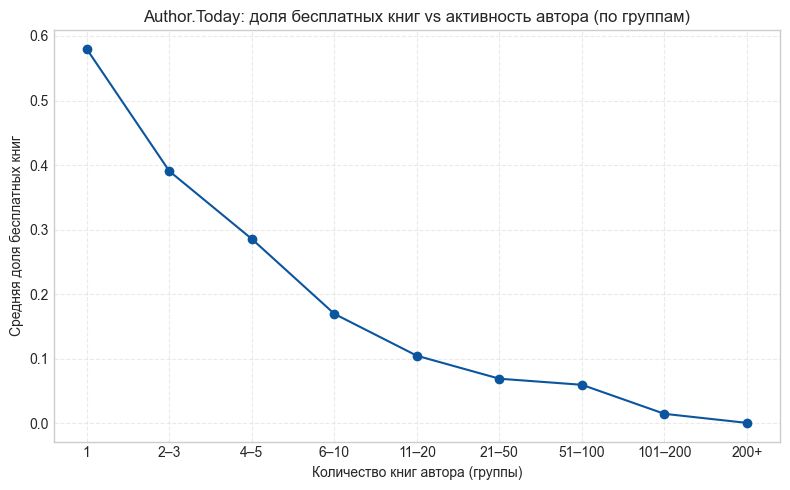

In [530]:
bins = [0, 1, 3, 5, 10, 20, 50, 100, 200, 800]
labels = ["1", "2–3", "4–5", "6–10", "11–20", "21–50", "51–100", "101–200", "200+"]

d_at["books_group"] = pd.cut(d_at["author_books_count"], bins=bins, labels=labels, include_lowest=True)
grouped = d_at.groupby("books_group")["is_free"].mean().dropna()

plt.figure(figsize=(8,5))
plt.plot(grouped.index.astype(str), grouped.values, marker="o")
plt.title("Author.Today: доля бесплатных книг vs активность автора (по группам)")
plt.xlabel("Количество книг автора (группы)")
plt.ylabel("Средняя доля бесплатных книг")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

/var/folders/1_/nzn6lhf551sdbvr_7pl_5b8c0000gn/T/ipykernel_3381/3150237099.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = d_at.groupby("books_group")["is_free"].mean().dropna()


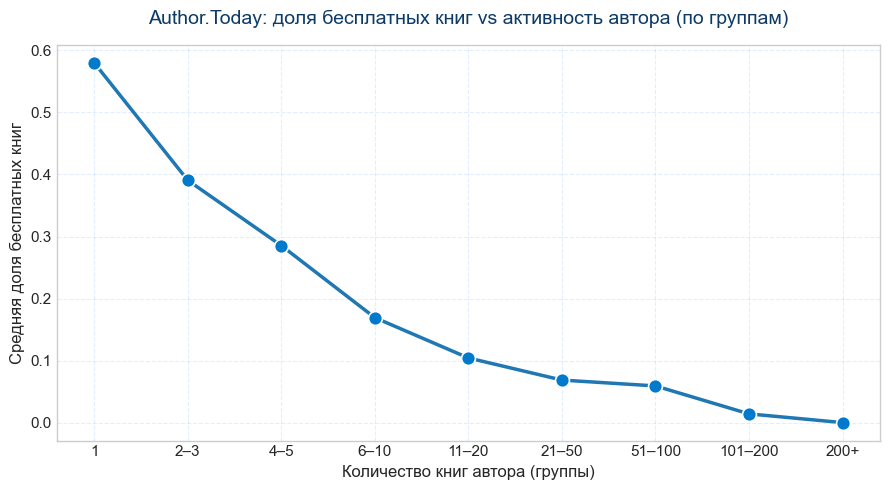

In [531]:
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Blues_r")

bins = [0, 1, 3, 5, 10, 20, 50, 100, 200, 800]
labels = ["1", "2–3", "4–5", "6–10", "11–20", "21–50", "51–100", "101–200", "200+"]

d_at["books_group"] = pd.cut(d_at["author_books_count"], bins=bins, labels=labels, include_lowest=True)
grouped = d_at.groupby("books_group")["is_free"].mean().dropna()

plt.figure(figsize=(9,5))
sns.lineplot(
    x=grouped.index.astype(str),
    y=grouped.values,
    marker="o",
    linewidth=2.5,
    color="#1f77b4"
)

plt.title("Author.Today: доля бесплатных книг vs активность автора (по группам)", fontsize=14, pad=15, color="#0d3b66")
plt.xlabel("Количество книг автора (группы)", fontsize=12)
plt.ylabel("Средняя доля бесплатных книг", fontsize=12)
plt.grid(alpha=0.3, linestyle="--", color="#a0c4ff")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

for x, y in zip(grouped.index.astype(str), grouped.values):
    plt.scatter(x, y, s=100, color="#007acc", edgecolor="white", linewidth=1.2, zorder=3)

plt.show()

In [532]:
author_stats = d_at.groupby("author_books_count")["is_free"].mean().reset_index()
transition_point = author_stats[author_stats["is_free"] < 0.5]["author_books_count"].min()
transition_point

np.int64(2)

<Figure size 1000x600 with 0 Axes>

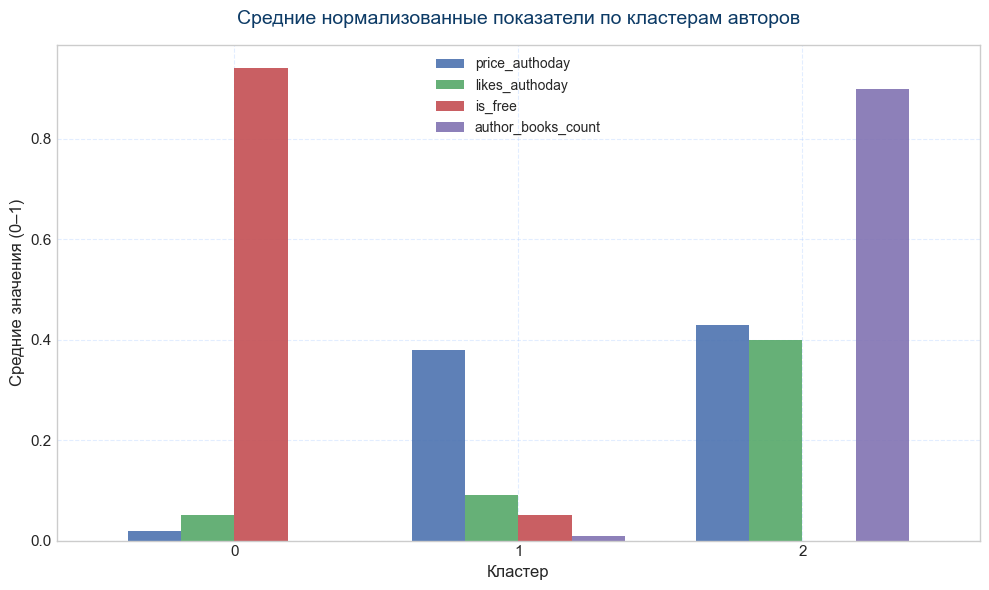

In [533]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

cols = ["price_authoday","likes_authoday","is_free","author_books_count"]

features = (
    d_at.groupby("authors")[cols]
    .mean()
    .fillna(0)
)

scaled = StandardScaler().fit_transform(features)
scaler = MinMaxScaler()
norm_features = pd.DataFrame(
    scaler.fit_transform(features),
    columns=cols, index=features.index
)

km = KMeans(n_clusters=3, random_state=42)
features["cluster"] = km.fit_predict(scaled)
norm_features["cluster"] = features["cluster"]

cluster_summary_norm = norm_features.groupby("cluster")[cols].mean().round(2)

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(10,6))

colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B2"] 

cluster_summary_norm.plot(
    kind="bar",
    figsize=(10,6),
    width=0.75,
    alpha=0.9,
    color=colors
)

plt.title("Средние нормализованные показатели по кластерам авторов", fontsize=14, pad=15, color="#0d3b66")
plt.ylabel("Средние значения (0–1)", fontsize=12)
plt.xlabel("Кластер", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="", fontsize=10)
plt.grid(alpha=0.3, linestyle="--", color="#a0c4ff")
plt.tight_layout()
plt.show()

In [534]:
d_at["is_series"] = d_at["cycle_authoday"].notna().astype(int)
d_at["is_series"].value_counts(normalize=True)

is_series
1    0.937287
0    0.062713
Name: proportion, dtype: float64

In [535]:
d_at.groupby("is_series")[["views_authoday","likes_authoday","comments_authoday"]].mean().round(1)

,views_authoday,likes_authoday,comments_authoday
is_series,,,
0,196070.4,1581.7,441.5
1,245274.0,2452.4,1015.2


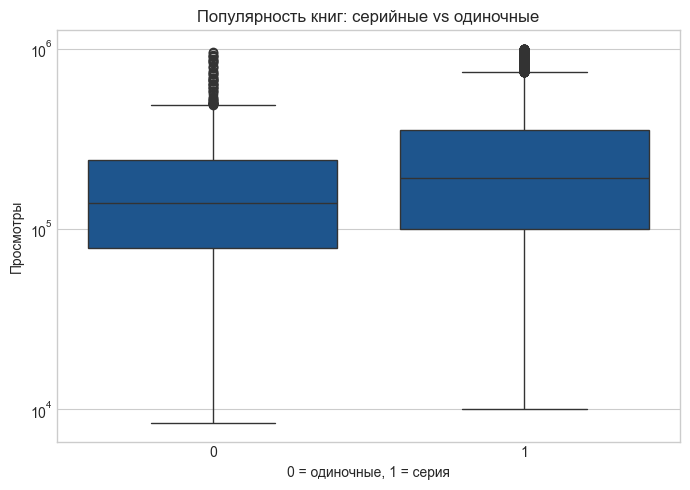

In [536]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.boxplot(x="is_series", y="views_authoday", data=d_at)
plt.title("Популярность книг: серийные vs одиночные")
plt.xlabel("0 = одиночные, 1 = серия")
plt.ylabel("Просмотры")
plt.yscale("log")  
plt.tight_layout()
plt.show()